## Clustering Model - Kmeans

In [1]:
import os, json
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [2]:
path_to_json = '/Users/adi/Desktop/CaffieneOverflow/Devfolio Scraper/Datbase' 

In [3]:
path_to_json

'/Users/adi/Desktop/CaffieneOverflow/Devfolio Scraper/Datbase'

In [4]:
json_pattern = os.path.join(path_to_json,'*.json')
file_list = glob.glob(json_pattern)

In [5]:
len(file_list)

20

In [6]:
file_list

['/Users/adi/Desktop/CaffieneOverflow/Devfolio Scraper/Datbase/finalDic18.json',
 '/Users/adi/Desktop/CaffieneOverflow/Devfolio Scraper/Datbase/finalDic7.json',
 '/Users/adi/Desktop/CaffieneOverflow/Devfolio Scraper/Datbase/finalDic14.json',
 '/Users/adi/Desktop/CaffieneOverflow/Devfolio Scraper/Datbase/finalDic15.json',
 '/Users/adi/Desktop/CaffieneOverflow/Devfolio Scraper/Datbase/finalDic6.json',
 '/Users/adi/Desktop/CaffieneOverflow/Devfolio Scraper/Datbase/finalDic19.json',
 '/Users/adi/Desktop/CaffieneOverflow/Devfolio Scraper/Datbase/finalDic1.json',
 '/Users/adi/Desktop/CaffieneOverflow/Devfolio Scraper/Datbase/finalDic12.json',
 '/Users/adi/Desktop/CaffieneOverflow/Devfolio Scraper/Datbase/finalDic13.json',
 '/Users/adi/Desktop/CaffieneOverflow/Devfolio Scraper/Datbase/finalDic0.json',
 '/Users/adi/Desktop/CaffieneOverflow/Devfolio Scraper/Datbase/finalDic10.json',
 '/Users/adi/Desktop/CaffieneOverflow/Devfolio Scraper/Datbase/finalDic3.json',
 '/Users/adi/Desktop/CaffieneOver

### Iterating through the json files, creating individual dataframes and combining them

In [7]:
dfs = [] 
for file in file_list:
    data =  pd.read_json(file, orient='records')
    dfs.append(data) 

projects = pd.concat(dfs, ignore_index=True)

In [8]:
projects

,idNo,name,desc,devfolioLink,githubLinks,special_mention,stacksUsed,longDesc
0,0,WECARE,"Our main slogan is ""Your wellbeing meets a new...",https://devfolio.co/submissions/wecare-112a,[https://github.com/sooddhruv/Sociothon],,"[Bootstrap, JavaScript, TensorFlow, AngularJS,...",The problem WECARE solves\n1) Buying and Selli...
1,1,INIGMA,MEDICINE GUIDE IN YOUR POCKET,https://devfolio.co/submissions/inigma-48f8,[https://github.com/VibhutiBansal-11/inigma_so...,,"[JavaScript, Flutter, Website: Bootstrap, App ...",The problem INIGMA solves\nWeak supply chain a...
2,2,TRUEMED,"""Lets Think Of Saving Money & Access to Medica...",https://devfolio.co/submissions/truemed-312c,"[https://truemed.herokuapp.com/, https://githu...",,"[HTML, CSS, JavaScript, Python, Data Science, ...",The problem TRUEMED solves\nMedicines constitu...
3,3,JAC informer,"Focus on the benefits. Payless, get more.",https://devfolio.co/submissions/jac-informer-a75e,"[https://devfolio-sociothon.netlify.app/, http...",,"[Netlify, React js, CSS Grid and Flexbox]",The problem JAC informer solves\nPromotes the ...
4,4,Clinica,Clinica tackles the problem of a weak supply c...,https://devfolio.co/submissions/clinica-e4f7,"[https://shrouded-basin-46770.herokuapp.com/, ...",,"[Node.js, JavaScript, Flask, scikit-learn, Num...",The problem Clinica solves\nTo tackle the prob...
...,...,...,...,...,...,...,...,...
344,7,Onion '78 - Mobile Wallet Tor Based PayJoin,Increase your privacy and security with Onion ...,https://devfolio.co/submissions/onion-a-payjoi...,[https://www.figma.com/file/FM4jE85Aybr6fT00ty...,,"[Tor, Chaincase, BTCPay, Segwit, Wasabi, CoinJ...",The problem Onion '78 - Mobile Wallet Tor Base...
345,8,Bitcoin Backup Helper,Build your own Bitcoin backup sheet,https://devfolio.co/submissions/bitcoin-backup...,[https://bit.ly/3cLwk6f],,"[Figma, HTML/CSS]",The problem Bitcoin Backup Helper solves\nBack...
346,9,Verist,A frame to bridge your NFTs with the physical ...,https://devfolio.co/submissions/verist-d5a5,[https://www.figma.com/proto/GZWzkY8MZaFRbkQQ0...,,[Figma],The problem Verist solves\nThe rise of NFTs ha...
347,10,Arigale,Decentralized CMS,https://devfolio.co/submissions/arigale-75c8,[http://arigale.hns.to/],,[React],The problem Arigale solves\nAllow user to mana...


In [9]:
projects['longDesc'][0]

"The problem WECARE solves\n1) Buying and Selling space: Medicines can be sold and bought in bulk according to their quality. This service can create a unique platform for bestselling quality products and can offer services for medicines according to the patient's demand.\n2) Compare the market prices: A customer in reality cannot compare the prices of medicines. So, they can compare the prices of medicines here.\n3) Buying of medical supplies: Medicines at times are of inferior quality. An excellent quality medicine can be put up on the site. It can provide a platform to list all the most required medicines in your locality. \n4) Basic awareness: It can be used as a smart platform to make users aware of the best and genuine medicine price. \n5) Constant notifications for users: Sending them constant emails regarding purchases, buying quotes and also the availability. We also give the numbers of those who are interested to buy medicines."

In [10]:
projects.drop('idNo',axis='columns', inplace=True)
projects

,name,desc,devfolioLink,githubLinks,special_mention,stacksUsed,longDesc
0,WECARE,"Our main slogan is ""Your wellbeing meets a new...",https://devfolio.co/submissions/wecare-112a,[https://github.com/sooddhruv/Sociothon],,"[Bootstrap, JavaScript, TensorFlow, AngularJS,...",The problem WECARE solves\n1) Buying and Selli...
1,INIGMA,MEDICINE GUIDE IN YOUR POCKET,https://devfolio.co/submissions/inigma-48f8,[https://github.com/VibhutiBansal-11/inigma_so...,,"[JavaScript, Flutter, Website: Bootstrap, App ...",The problem INIGMA solves\nWeak supply chain a...
2,TRUEMED,"""Lets Think Of Saving Money & Access to Medica...",https://devfolio.co/submissions/truemed-312c,"[https://truemed.herokuapp.com/, https://githu...",,"[HTML, CSS, JavaScript, Python, Data Science, ...",The problem TRUEMED solves\nMedicines constitu...
3,JAC informer,"Focus on the benefits. Payless, get more.",https://devfolio.co/submissions/jac-informer-a75e,"[https://devfolio-sociothon.netlify.app/, http...",,"[Netlify, React js, CSS Grid and Flexbox]",The problem JAC informer solves\nPromotes the ...
4,Clinica,Clinica tackles the problem of a weak supply c...,https://devfolio.co/submissions/clinica-e4f7,"[https://shrouded-basin-46770.herokuapp.com/, ...",,"[Node.js, JavaScript, Flask, scikit-learn, Num...",The problem Clinica solves\nTo tackle the prob...
...,...,...,...,...,...,...,...
344,Onion '78 - Mobile Wallet Tor Based PayJoin,Increase your privacy and security with Onion ...,https://devfolio.co/submissions/onion-a-payjoi...,[https://www.figma.com/file/FM4jE85Aybr6fT00ty...,,"[Tor, Chaincase, BTCPay, Segwit, Wasabi, CoinJ...",The problem Onion '78 - Mobile Wallet Tor Base...
345,Bitcoin Backup Helper,Build your own Bitcoin backup sheet,https://devfolio.co/submissions/bitcoin-backup...,[https://bit.ly/3cLwk6f],,"[Figma, HTML/CSS]",The problem Bitcoin Backup Helper solves\nBack...
346,Verist,A frame to bridge your NFTs with the physical ...,https://devfolio.co/submissions/verist-d5a5,[https://www.figma.com/proto/GZWzkY8MZaFRbkQQ0...,,[Figma],The problem Verist solves\nThe rise of NFTs ha...
347,Arigale,Decentralized CMS,https://devfolio.co/submissions/arigale-75c8,[http://arigale.hns.to/],,[React],The problem Arigale solves\nAllow user to mana...


### creating a tf_idf vectorizer and using that to find out the tf_idf values of the words in 'longDesc' of each project
### then storing those values in a sparse matrix and then extracting the non-zero values


In [20]:
tfidf = TfidfVectorizer()
csr_mat = tfidf.fit_transform(projects['longDesc'])
b = csr_mat.toarray()
non_zero = b[b.nonzero()]

non_zero.shape

(31791,)

In [21]:
words = tfidf.get_feature_names()

print(len(sorted(words)))

5708


### Plotting inertia values vs number of clusters to pick value of 'k'

In [26]:
ks = range(1,11)

inertias = []

for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(csr_mat)
    inertias.append(model.inertia_)

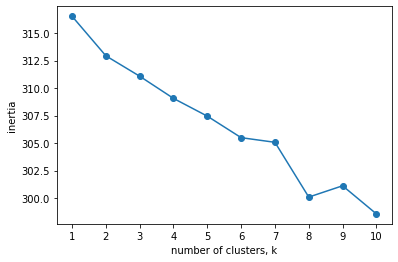

In [27]:
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [28]:
pd.set_option('display.max_rows', 350)

### Creating a TruncatedSVD instance and a Kmeans model instance and creating a pipeline using these

In [29]:
svd = TruncatedSVD(n_components=50)
kmeans = KMeans(n_clusters=8)
pipeline = make_pipeline(svd, kmeans)

### Fitting data 

In [30]:
pipeline.fit(csr_mat)


labels = pipeline.predict(csr_mat)


df = pd.DataFrame({'label': labels, 'project': projects['name']})


print(df.sort_values('label'))

     label                                            project
274      0                                             COVATT
311      0                                      Health'N'Help
312      0                                            Park.ai
313      0                                          AnonyMate
261      0  Stock Price Prediction – Machine Learning Project
85       0                                          Not known
84       0            CONTAMINATED VIRUS PROTECTIVE SMART HAT
260      0                          Decentralized Derivatives
81       0                                      Rakshak Drone
79       0                                          Companion
257      0                                           E-Daftar
77       0                           Ethereum Hack: Karbonize
139      0                                         Healthy Me
74       0                                                  -
73       0                                           Trinetra
317     

In [38]:
projects

,name,desc,devfolioLink,githubLinks,special_mention,stacksUsed,longDesc,label
0,WECARE,"Our main slogan is ""Your wellbeing meets a new...",https://devfolio.co/submissions/wecare-112a,[https://github.com/sooddhruv/Sociothon],,"[Bootstrap, JavaScript, TensorFlow, AngularJS,...",The problem WECARE solves\n1) Buying and Selli...,6
1,INIGMA,MEDICINE GUIDE IN YOUR POCKET,https://devfolio.co/submissions/inigma-48f8,[https://github.com/VibhutiBansal-11/inigma_so...,,"[JavaScript, Flutter, Website: Bootstrap, App ...",The problem INIGMA solves\nWeak supply chain a...,0
2,TRUEMED,"""Lets Think Of Saving Money & Access to Medica...",https://devfolio.co/submissions/truemed-312c,"[https://truemed.herokuapp.com/, https://githu...",,"[HTML, CSS, JavaScript, Python, Data Science, ...",The problem TRUEMED solves\nMedicines constitu...,6
3,JAC informer,"Focus on the benefits. Payless, get more.",https://devfolio.co/submissions/jac-informer-a75e,"[https://devfolio-sociothon.netlify.app/, http...",,"[Netlify, React js, CSS Grid and Flexbox]",The problem JAC informer solves\nPromotes the ...,0
4,Clinica,Clinica tackles the problem of a weak supply c...,https://devfolio.co/submissions/clinica-e4f7,"[https://shrouded-basin-46770.herokuapp.com/, ...",,"[Node.js, JavaScript, Flask, scikit-learn, Num...",The problem Clinica solves\nTo tackle the prob...,6
5,MediSure,We have developed a web as well as an Android ...,https://devfolio.co/submissions/medisure-151b,"[https://iamaj69.pythonanywhere.com/, https://...",,"[NumPy, pandas, Django 3]",The problem MediSure solves\nSince the concept...,0
6,Jan Aushadhi and Government of India,Generic medicine at your footstep,https://devfolio.co/submissions/jan-aushadhi-a...,[https://github.com/HariPrasad5724/MedicineWeb...,,"[Express.js, MongoDB, Node js, React js, Boots...",The problem Jan Aushadhi and Government of Ind...,0
7,Easy-Meds,Our project mainly aims in promoting the usage...,https://devfolio.co/submissions/easymeds-69ad,"[https://github.com/RagulRaj-S/Easy-meds, http...",,"[JSON, Materialize CSS, React.js]",The problem Easy-Meds solves\nAs India is one ...,6
8,CoVax,One stop destination for all your COVID proble...,https://devfolio.co/submissions/covax-0920,"[https://github.com/gauravraj0510/CoVax-JAAR, ...",,"[Django, JavaScript, Python, Django rest frame...",The problem CoVax solves\nDue to the COVID sit...,6
9,Pictionary.ai,AI that can identify what picture you're drawing,https://devfolio.co/submissions/pictionaryai-ffe7,"[https://github.com/SockAndSandal/KJSCEHack, h...",,"[Flask, TensorFlow, Keras, Heroku, p5.js, Pyth...",The problem Pictionary.ai solves\nPictionary.a...,0


In [34]:
projects['label'] = pd.DataFrame({'label': labels })

In [35]:
projects

,name,desc,devfolioLink,githubLinks,special_mention,stacksUsed,longDesc,label
0,WECARE,"Our main slogan is ""Your wellbeing meets a new...",https://devfolio.co/submissions/wecare-112a,[https://github.com/sooddhruv/Sociothon],,"[Bootstrap, JavaScript, TensorFlow, AngularJS,...",The problem WECARE solves\n1) Buying and Selli...,6
1,INIGMA,MEDICINE GUIDE IN YOUR POCKET,https://devfolio.co/submissions/inigma-48f8,[https://github.com/VibhutiBansal-11/inigma_so...,,"[JavaScript, Flutter, Website: Bootstrap, App ...",The problem INIGMA solves\nWeak supply chain a...,0
2,TRUEMED,"""Lets Think Of Saving Money & Access to Medica...",https://devfolio.co/submissions/truemed-312c,"[https://truemed.herokuapp.com/, https://githu...",,"[HTML, CSS, JavaScript, Python, Data Science, ...",The problem TRUEMED solves\nMedicines constitu...,6
3,JAC informer,"Focus on the benefits. Payless, get more.",https://devfolio.co/submissions/jac-informer-a75e,"[https://devfolio-sociothon.netlify.app/, http...",,"[Netlify, React js, CSS Grid and Flexbox]",The problem JAC informer solves\nPromotes the ...,0
4,Clinica,Clinica tackles the problem of a weak supply c...,https://devfolio.co/submissions/clinica-e4f7,"[https://shrouded-basin-46770.herokuapp.com/, ...",,"[Node.js, JavaScript, Flask, scikit-learn, Num...",The problem Clinica solves\nTo tackle the prob...,6
5,MediSure,We have developed a web as well as an Android ...,https://devfolio.co/submissions/medisure-151b,"[https://iamaj69.pythonanywhere.com/, https://...",,"[NumPy, pandas, Django 3]",The problem MediSure solves\nSince the concept...,0
6,Jan Aushadhi and Government of India,Generic medicine at your footstep,https://devfolio.co/submissions/jan-aushadhi-a...,[https://github.com/HariPrasad5724/MedicineWeb...,,"[Express.js, MongoDB, Node js, React js, Boots...",The problem Jan Aushadhi and Government of Ind...,0
7,Easy-Meds,Our project mainly aims in promoting the usage...,https://devfolio.co/submissions/easymeds-69ad,"[https://github.com/RagulRaj-S/Easy-meds, http...",,"[JSON, Materialize CSS, React.js]",The problem Easy-Meds solves\nAs India is one ...,6
8,CoVax,One stop destination for all your COVID proble...,https://devfolio.co/submissions/covax-0920,"[https://github.com/gauravraj0510/CoVax-JAAR, ...",,"[Django, JavaScript, Python, Django rest frame...",The problem CoVax solves\nDue to the COVID sit...,6
9,Pictionary.ai,AI that can identify what picture you're drawing,https://devfolio.co/submissions/pictionaryai-ffe7,"[https://github.com/SockAndSandal/KJSCEHack, h...",,"[Flask, TensorFlow, Keras, Heroku, p5.js, Pyth...",The problem Pictionary.ai solves\nPictionary.a...,0


### Saving the clustered data

In [36]:
projects.to_csv(r'/Users/adi/Desktop/CaffieneOverflow/Clustered Data/data_clustered_kmeans.csv')

In [37]:
projects.to_json(r'/Users/adi/Desktop/CaffieneOverflow/Clustered Data/data_clustered_kmeans.json')